In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

## Question 1

In [2]:
def f_question(t,s):
    return s

In [3]:
def f(t, s):
    return np.exp(t)

In [4]:
# Runge-Kutta from question 1.
def rk4(f, t0, x0, tau, n, output = False):
    traj = np.zeros(n+1)
    tt = []
    h = ((tau - t0) / n)
    
    traj[0] = x0
    
    t = t0
    tt.append(t)
    for ii in range(n):
        
        K1 = h * f(t, traj[ii])
        K2 = h * f(t + h/2, traj[ii] + K1/2)
        K3 = h * f(t + h/2, traj[ii] + K2/2)
        K4 = h * f(t + h, traj[ii] + K3)
        
        traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)
        t =  t + h

        if output == True:
            print(traj[ii+1], t, h)
        tt.append(t)
    
    return traj, tt

In [5]:
N = [1, 2, 4, 8, 16, 32, 64]
table = np.zeros((len(N), 6))
t0 = 0
x0 = 1
tau = 5


In [6]:
sols = []
times = []
prev_sol = 1
for i, n in enumerate(N):
    h = ((tau - t0) / n)
    sol, time = rk4(f_question, t0, x0, tau, n, False)
    sols.append(sol)
    times.append(time)
    
    table[i,0] = n
    table[i,1] = h
    table[i,2] = sol[-1]
    table[i,3] = abs(sol[-1] - np.exp(1))
    table[i,4] = abs(sol[-1] - prev_sol)
    if i>1:
        table[i,5] = abs(sol[-1] - prev_sol) / abs(prev_sol - table[i-2,5])
    prev_sol=sol[-1]

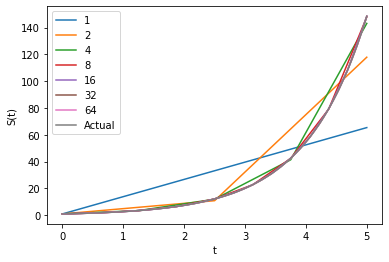

In [7]:
for ii in range(len(sols)):
    
    plt.plot(times[ii], sols[ii], label = N[ii])

plt.plot(np.linspace(0,5,100), np.exp(np.linspace(0,5,100)), label = 'Actual')    
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.savefig("figures/various_grids.pdf",dpi=300)  
plt.show()

# Question 2

In [8]:
N = [1, 2, 4, 8, 16, 32, 64]
tau = 1

In [9]:
# coluumns:
# n, h, sol, sol-e, sol-prev_sol, abs(sol)/abs(prev_sol)

table = np.zeros((len(N), 6))

In [10]:
sols = []
times = []
prev_sol = 1
for i, n in enumerate(N):
    h = ((tau - t0) / n)
    sol, time = rk4(f_question, t0, x0, tau, n, False)
    sols.append(sol)
    times.append(time)
    
    table[i,0] = n
    table[i,1] = h
    table[i,2] = sol[-1]
    table[i,3] = abs(sol[-1] - np.exp(1))
    table[i,4] = abs(sol[-1] - prev_sol)
    if i>1:
        table[i,5] = abs(sol[-1] - prev_sol) / abs(prev_sol - table[i-2,5])
    prev_sol=sol[-1]

In [11]:
df = pd.DataFrame(table)
df.columns = ['n', 'h','s(1)', 's(1) - e', 'diff', 'ratio']
df

,n,h,s(1),s(1) - e,diff,ratio
0,1.0,1.000000,2.708333,9.948495e-03,1.708333e+00,0.000000e+00
1,2.0,0.500000,2.717346,9.356371e-04,9.012858e-03,0.000000e+00
2,4.0,0.250000,2.718210,7.188926e-05,8.637478e-04,3.178645e-04
3,8.0,0.125000,2.718277,4.984042e-06,6.690522e-05,2.461370e-05
4,16.0,0.062500,2.718282,3.281185e-07,4.655924e-06,1.713022e-06
5,32.0,0.031250,2.718282,2.104785e-08,3.070706e-07,1.129660e-07
6,64.0,0.015625,2.718282,1.332718e-09,1.971514e-08,7.252798e-09


In [12]:
df.to_latex()

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\1669264725.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex()


'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &     n &         h &      s(1) &      s(1) - e &          diff &         ratio \\\\\n\\midrule\n0 &   1.0 &  1.000000 &  2.708333 &  9.948495e-03 &  1.708333e+00 &  0.000000e+00 \\\\\n1 &   2.0 &  0.500000 &  2.717346 &  9.356371e-04 &  9.012858e-03 &  0.000000e+00 \\\\\n2 &   4.0 &  0.250000 &  2.718210 &  7.188926e-05 &  8.637478e-04 &  3.178645e-04 \\\\\n3 &   8.0 &  0.125000 &  2.718277 &  4.984042e-06 &  6.690522e-05 &  2.461370e-05 \\\\\n4 &  16.0 &  0.062500 &  2.718282 &  3.281185e-07 &  4.655924e-06 &  1.713022e-06 \\\\\n5 &  32.0 &  0.031250 &  2.718282 &  2.104785e-08 &  3.070706e-07 &  1.129660e-07 \\\\\n6 &  64.0 &  0.015625 &  2.718282 &  1.332718e-09 &  1.971514e-08 &  7.252798e-09 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Question 3

In [173]:
def f(x1, x2, lmbda = .25, mu = .35):
    return np.array([-x2 , lmbda - mu*x2 - x1**2 - x1*x2])

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\2820961784.py:13: RuntimeWarning: invalid value encountered in true_divide
  U = u / np.sqrt(u**2 + v**2);
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\2820961784.py:14: RuntimeWarning: invalid value encountered in true_divide
  V = v / np.sqrt(u**2 + v**2);


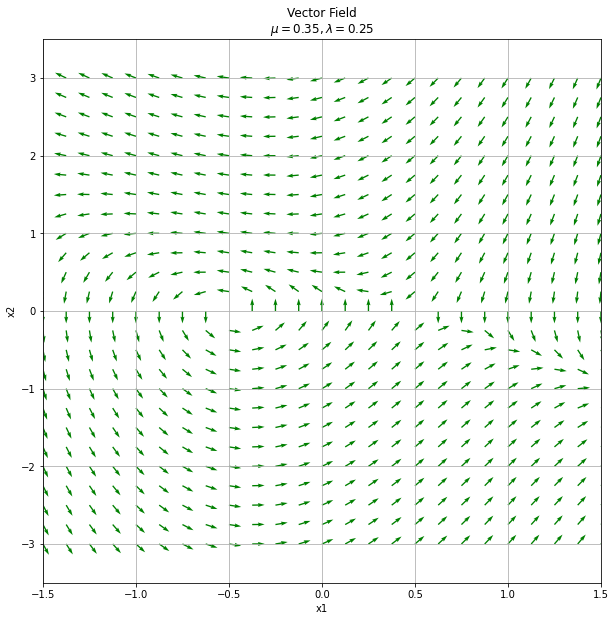

In [174]:
# Meshgrid
n = 25
x_max = 1.5
x_min = -1.5

x, y = np.meshgrid(np.linspace(x_min, x_max, n), 
                   np.linspace(-3, 3, n))
  
# Directional vectors
u = f(x,y)[0]
v = f(x,y)[1]

U = u / np.sqrt(u**2 + v**2);
V = v / np.sqrt(u**2 + v**2);
  
# Plotting Vector Field with QUIVER
plt.figure( figsize = (10, 10))
#plt.quiver(x, y, u, v, color='g')
plt.quiver(x, y, U, V, color='g')
#lt.quiver(x, y, np.ones(len(u)), np.ones(len(v)), color='g')
plt.title('Vector Field\n$\mu=0.35, \lambda=0.25$')
plt.xlabel('x1')
plt.ylabel('x2')
  
# Setting x, y boundary limits
plt.xlim(x_min, x_max)
plt.ylim(-3.5, 3.5)
plt.savefig("figures/vector_field_35_25.pdf",dpi=300)  
# Show plot with grid
plt.grid()
plt.show()

In [16]:
# Stable point = x1 = +sqrt(lambda) x2=0

#### A) Steady states in vector field

$$
\dot{s} = f(x), 
f(x) = \begin{pmatrix}
-x_2 \\
\lambda - \mu x_2 -x_{1}^{2}-x_{1}x_2
\end{pmatrix}
$$

For a state to be a steady state, the derivative has to be 0. Hence, 
$$
f(x1,x2) = \begin{pmatrix}
0 \\
0
\end{pmatrix}
$$
Thus x2=0. 
$$
\lambda - \mu x_2 - x_{1}^{2}-x_1x_2 = 0 \\
x_2 = 0 \\
x_{1}^{2} = \lambda \\
x_{1}= \pm \sqrt{\lambda}
$$

### B) Region where there are no and 2 steady states
2 steady states:
$$
 \lambda>0
$$

What is lambda = 0? -> 1 steady state <br>
No steady states:
$$
\lambda <0
$$


In [17]:
def give_steady_states(mu, lam):
    return np.array([[-np.sqrt(lam), 0], [np.sqrt(lam), 0]]) 

In [18]:
give_steady_states(1, 53)

array([[-7.28010989,  0.        ],
       [ 7.28010989,  0.        ]])

### C) Stability for the two steady states 

Theory:
$$
s = \bar{x}+y \\
\dot{s} = \dot{y}\\
$$

Taylor Expand
$$
\dot{y} = f(\bar{x})+\frac{\partial f}{\partial{x}}(\bar{x})y+R(y)
$$

Define A
$$
A = \frac{\partial f}{\partial{x}}(\bar{x})
$$

Look at the real part of the eigenvalues to determine the dynamics around the stable points

In our case:
$$
\bar{x} = \begin{pmatrix}
\pm\sqrt{\lambda} \\
0
\end{pmatrix},
A = \begin{pmatrix}
\frac{\partial{f_1}}{\partial{x_1}} & \frac{\partial{f_1}}{\partial{x_2}}\\
\frac{\partial{f_2}}{\partial{x_1}} & \frac{\partial{f_2}}{\partial{x_2}}
\end{pmatrix} = \begin{pmatrix}
0 & 1\\
-2x_1-x_2 & -\mu-x_1
\end{pmatrix}
$$

Then, the eigenvalues are:
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
-2x_1-x_2 & -\mu-x_1-\kappa
\end{pmatrix}
$$

Considered at the positive stable point
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
-2\sqrt{\lambda} & -\mu-\sqrt{\lambda}-\kappa
\end{pmatrix}\\
=-\kappa(-\mu-\sqrt{\lambda}-\kappa)+2\sqrt{\lambda}\\
=\kappa^2-\kappa\mu-\kappa\sqrt{\lambda}+2\sqrt{\lambda}
$$

Solve for $\kappa$
$$
\kappa=\frac{1}{2}(-\sqrt{\lambda}-\mu\pm\sqrt{\lambda+\mu^2+2\sqrt{\lambda}(4+\mu)})
$$

Considered at the negative stable point
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
2\sqrt{\lambda} & -\mu+\sqrt{\lambda}-\kappa
\end{pmatrix}\\
=-\kappa(-\mu+\sqrt{\lambda}-\kappa)-2\sqrt{\lambda}\\
=\kappa^2-\kappa\mu+\kappa\sqrt{\lambda}-2\sqrt{\lambda}
$$

Solve for $\kappa$
$$
\kappa=\frac{1}{2}(-\sqrt{\lambda}-\mu\pm\sqrt{\lambda+\mu^2-2\sqrt{\lambda}(4+\mu)})
$$


In [19]:
# stability of parameter space
def point1_eigenvalues(mu, lam):
    return [0.5*(-np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu), 0.5*(np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu)]

def point2_eigenvalues(mu, lam):
    if lam<0:
        return [np.nan, np.nan]
    elif (-2*np.sqrt(lam)*mu-7*lam+mu**2)<0:
        return[f"{0.5*(np.sqrt(lam)-mu)} + j",f"{0.5*(np.sqrt(lam)-mu)} + j"]
    return [0.5*(-np.sqrt(-2*np.sqrt(lam)*mu-7*lam+mu**2)+np.sqrt(lam)-mu), 0.5*(np.sqrt(-2*np.sqrt(lam)*mu-7*lam+mu**2)+np.sqrt(lam)-mu)]

In [20]:
point1_eigenvalues(1,1)

[-2.732050807568877, 0.7320508075688772]

In [21]:
point2_eigenvalues(1,1)

['0.0 + j', '0.0 + j']

In [22]:
mus=np.linspace(-20,20)
lambdas=np.linspace(-20,20)

In [23]:
point1_eigenvalues(mus,1)

[array([ -0.10468636,  -0.10933141,  -0.11440501,  -0.11996889,
         -0.12609712,  -0.13287936,  -0.14042512,  -0.14886952,
         -0.15838111,  -0.16917276,  -0.181517  ,  -0.19576796,
         -0.2123937 ,  -0.23202449,  -0.25552719,  -0.28412222,
         -0.31957312,  -0.36450121,  -0.42291871,  -0.50113608,
         -0.60925083,  -0.76324561,  -0.9865174 ,  -1.30641606,
         -1.74076012,  -2.28386989,  -2.91143603,  -3.59685729,
         -4.32009558,  -5.06809498,  -5.83269083,  -6.60875147,
         -7.39297603,  -8.1831793 ,  -8.97787198,  -9.77601099,
        -10.57684736, -11.37983116, -12.18455045, -12.99069109,
        -13.79800967, -14.60631483, -15.41545422, -16.22530506,
        -17.0357674 , -17.84675904, -18.65821182, -19.47006871,
        -20.2822817 , -21.09481005]),
 array([19.10468636, 18.29300488, 17.48175195, 16.67098929, 15.86079099,
        15.0512467 , 14.24246594, 13.4345838 , 12.62776886, 11.82223399,
        11.01825169, 10.21617613,  9.41647533,  

In [24]:
point1_eigenvalues(1,lambdas)

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\41993962.py:3: RuntimeWarning: invalid value encountered in sqrt
  return [0.5*(-np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu), 0.5*(np.sqrt(2*np.sqrt(lam)*(mu+4)+lam+mu**2)-np.sqrt(lam)-mu)]


[array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
        -2.21558735, -2.87606668, -3.29554318, -3.62332391, -3.89961401,
        -4.14203967, -4.36012445, -4.55967946, -4.74454815, -4.9174234 ,
        -5.08027558, -5.23459606, -5.38154485, -5.52204454, -5.6568428 ,
        -5.78655519, -5.91169551, -6.03269766, -6.14993197, -6.26371738,
        -6.37433086, -6.48201469, -6.5869822 , -6.68942237, -6.78950354]),
 array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        n

In [25]:
## stability steady state x1=np.sqrt(lam)
## The steady state has a negative and a positive eigenvalue for all values of mu and lambda greater than 0. 
## This steady state is an unstable saddle point

In [26]:
for mu in mus:
    print(point2_eigenvalues(mu,1))

[0.09567397665759358, 20.904326023342406]
[0.09958129962233464, 20.08409216976542]
[0.10382316462180441, 19.263523774153708]
[0.10844472236816927, 18.442575685795095]
[0.11349968556099022, 17.62119419199003]
[0.11905247417215747, 16.79931487276662]
[0.12518104487426474, 15.976859771452265]
[0.1319806756182862, 15.153733610095998]
[0.1395691075505514, 14.32981864755149]
[0.14809365439939448, 13.504967570090402]
[0.15774122807096003, 12.678993465806592]
[0.16875279767300633, 11.851655365592299]
[0.18144478749460724, 11.022636845158454]
[0.19624170844506583, 10.191513393595752]
[0.2137277126270689, 9.357700858801502]
[0.2347315775315426, 8.520370463284783]
[0.26047428208140166, 7.678301228122679]
[0.2928426475500956, 6.829606332041742]
[0.3349421557879264, 5.971180293191665]
[0.3923536330697752, 5.0974422852975705]
[0.4765387285096514, 4.19693065924545]
[0.6173171606652985, 3.239825696477559]
[0.962160025853474, 2.078656300677136]
['1.112244897959183 + j', '1.112244897959183 + j']
['0.704

In [27]:
for lam in lambdas:
    print(point2_eigenvalues(1,lam))

[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
[nan, nan]
['-0.1805617175000302 + j', '-0.1805617175000302 + j']
['0.053283335172487845 + j', '0.053283335172487845 + j']
['0.21428571428571452 + j', '0.21428571428571452 + j']
['0.3451542547285167 + j', '0.3451542547285167 + j']
['0.4583148474999098 + j', '0.4583148474999098 + j']
['0.5594569267279521 + j', '0.5594569267279521 + j']
['0.651751106899793 + j', '0.651751106899793 + j']
['0.7371791482634837 + j', '0.7371791482634837 + j']
['0.8170777796132696 + j', '0.8170777796132696 + j']
['0.8923991921155661 + j', '0.8923991921155661 + j']
['0.9638501094227998 + j', '0.9638501094227998 + j']
['1.0319721849662298 + j', '1.0319721849662298 + j']
['1.0971914124998499 + j', '1.0971914124998499 + j']
['1.1598500055174645 + j', '1.

In [28]:
## The steady state has two positive eigenvalues for mu< 

In [29]:
def complex_part(mu, lam):
    return -2*np.sqrt(lam)*mu-7*lam+mu**2
def real_part(mu,lam):
    return 0.5*(np.sqrt(lam)-mu)

Text(0.5, 1.0, 'parameter space $\\mu$ for $\\lambda=1$')

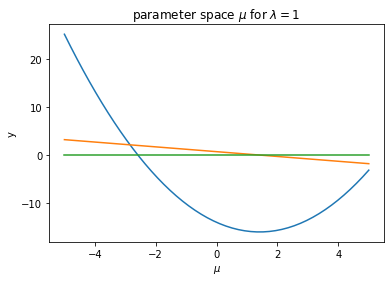

In [30]:
mus=np.linspace(-5,5)
plt.plot(mus, complex_part(mus,np.ones(len(mus))*2))
plt.plot(mus, real_part(mus,np.ones(len(mus))*2))
plt.plot(mus, np.zeros(len(mus)))
plt.xlabel("$\mu$")
plt.ylabel("y")
plt.title("parameter space $\mu$ for $\lambda=1$")
#plt.savefig("figures/parameter_space.pdf", dpi=300)

## Question 4

In [31]:
lambdas = 0.25
mus = [0.55, 0.45, 0.35]
t0 = 0
T = 160
N = 64

In [32]:
def ff(x,t, lam=0.25,mu=.45):
    x1=x[0]
    x2=x[1]
    return np.array([-x2, -lam-mu*x2-x1**2-x1*x2])

In [42]:
def rk4(f, t0, x0, tau, n):
    """
    f: a function f(t,x)
    t0: initial time t_0
    x0: initial state x_0
    tau: final time
    n: number of gridpoints (integration steps)
    """
    m = x0.shape[0]
    
    # contains all the n+1 components of the solution s(t) for an ODE f(t,x)
    trajectory = np.zeros((n, m))
    
    # time 
    t = np.zeros((n+1, m))
    
    # first component is the initial guess, x0
    trajectory = np.vstack([x0, trajectory])
    
    # first time point is t0
    t[0] = t0
    
    h = (tau - t0) / n 
    
    for i in range(n):
        
        k1 = f(t[i], trajectory[i])
        k2 = f(t[i] + (h / 2), trajectory[i] + (h * k1 / 2))
        k3 = f(t[i] + (h / 2), trajectory[i] + (h * k2 / 2))
        k4 = f(t[i] + h, trajectory[i] + (h * k3))
        
        trajectory[i+1] = trajectory[i] + ((h / 6) * (k1 + 2*k2 + 2*k3 + k4))
        
        t[i+1] = t[i] + h
        
    return trajectory, t

In [90]:
def f(t, x):
    x1 = x[0]
    x2 = x[1]
    result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
    return result


t0 = 0
x0 = np.array([0.499999, 0])
tau = 160
n = 1024

lam = 0.25
mus = [0.35, 0.45, 0.55]

In [91]:
trajectories = []
times = []
for mu in mus:
    trajectory, time = rk4(f, t0, x0, tau, n)
    trajectories.append(trajectory)
    times.append(time)

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\1227484431.py:32: RuntimeWarning: invalid value encountered in add
  trajectory[i+1] = trajectory[i] + ((h / 6) * (k1 + 2*k2 + 2*k3 + k4))


In [122]:
time[:,0]

array([0.0000000e+00, 1.5625000e-01, 3.1250000e-01, ..., 1.5968750e+02,
       1.5984375e+02, 1.6000000e+02])

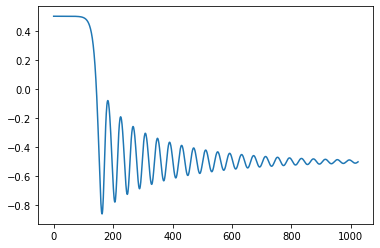

In [120]:
plt.plot(curr)

In [118]:
curr = []
for element in trajectories[i][:,0]:
    curr.append(element)

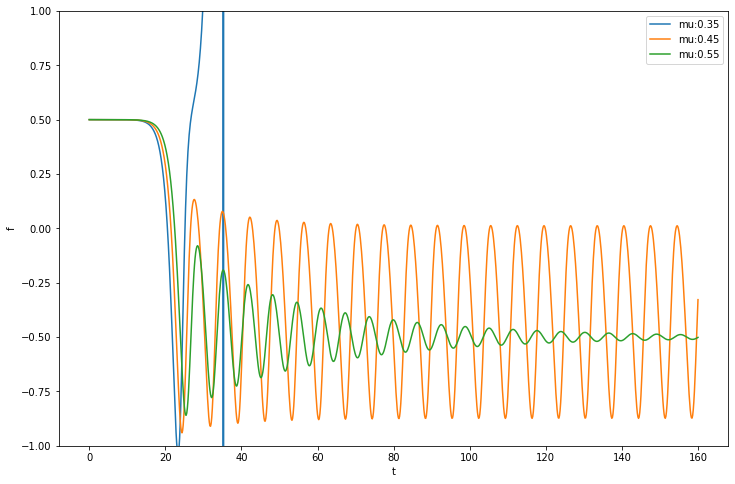

In [125]:
plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'mu:{mus[i]}')
plt.ylim([-1, 1])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/mus.pdf',dpi=300)
plt.show()


In [53]:
# B)
def eigenvec1(mu):
    return np.array([-1*(0.5*np.sqrt(mu**2+mu+4.25)+0.5*mu+0.25), 1])

In [142]:
h=10e-6
x0=[0.5,0]
labels = ['plus h', 'minus h']

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])


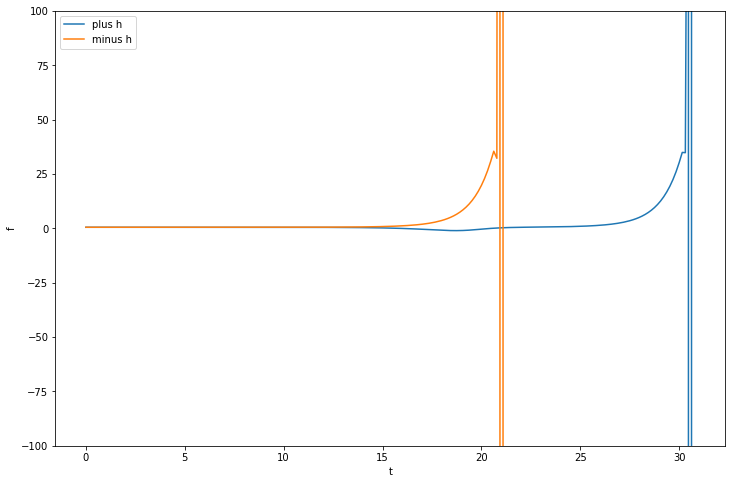

In [157]:
trajectories = []
times = []
mu=.35

trajectory, time = rk4(f, t0, x0+h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

trajectory, time = rk4(f, t0, x0-h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'{labels[i]}')
plt.ylim([-100, 100])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/orbit_35.pdf',dpi=300)
plt.show()

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])


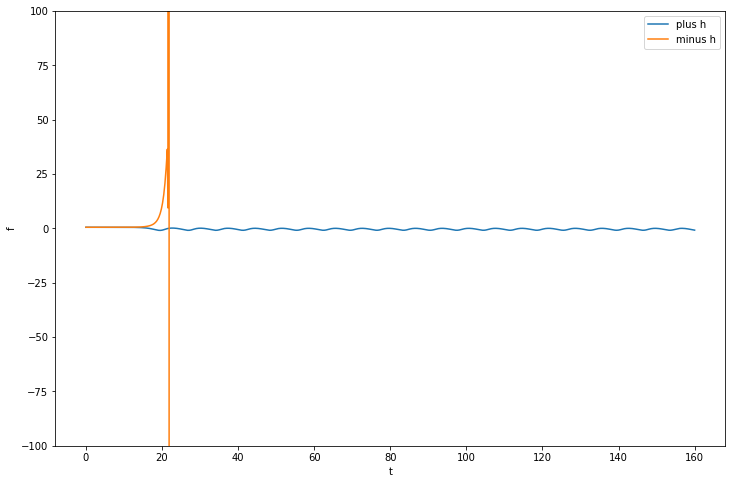

In [158]:
trajectories = []
times = []
mu=.45

trajectory, time = rk4(f, t0, x0+h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

trajectory, time = rk4(f, t0, x0-h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'{labels[i]}')
plt.ylim([-100, 100])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/orbit45.pdf',dpi=300)
plt.show()

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])


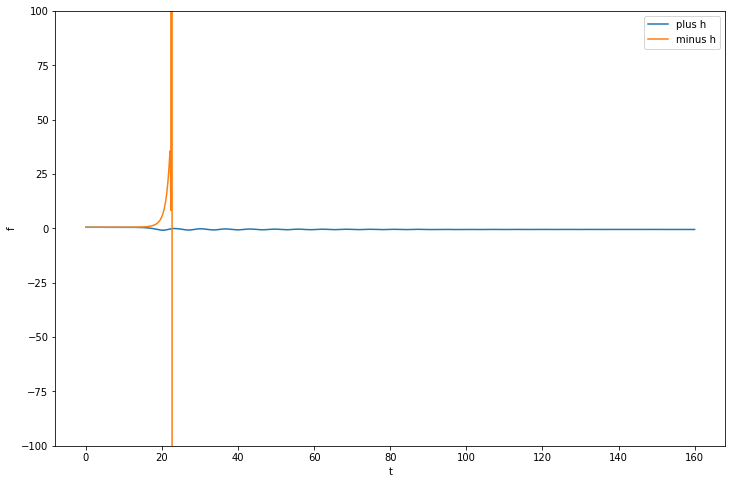

In [159]:
trajectories = []
times = []
mu=.55

trajectory, time = rk4(f, t0, x0+h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

trajectory, time = rk4(f, t0, x0-h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'{labels[i]}')
plt.ylim([-100, 100])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/orbit55.pdf',dpi=300)
plt.show()

In [160]:
def rk4_backward(f, t0, x0, tau, n):
    """
    f: a function f(t,x)
    t0: initial time t_0
    x0: initial state x_0
    tau: final time
    n: number of gridpoints (integration steps)
    """
    m = x0.shape[0]
    
    # contains all the n+1 components of the solution s(t) for an ODE f(t,x)
    trajectory = np.zeros((n, m))
    
    # time 
    t = np.zeros((n+1, m))
    
    # first component is the initial guess, x0
    trajectory = np.vstack([x0, trajectory])
    
    # first time point is t0
    t[0] = t0
    
    h = (tau - t0) / n 
    
    for i in range(n):
        
        k1 = f(t[i], trajectory[i])
        k2 = f(t[i] + (h / 2), trajectory[i] + (h * k1 / 2))
        k3 = f(t[i] + (h / 2), trajectory[i] + (h * k2 / 2))
        k4 = f(t[i] + h, trajectory[i] + (h * k3))
        
        trajectory[i+1] = trajectory[i] + ((h / 6) * (k1 + 2*k2 + 2*k3 + k4))
        
        t[i+1] = t[i] - h
        
    return trajectory, t

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])


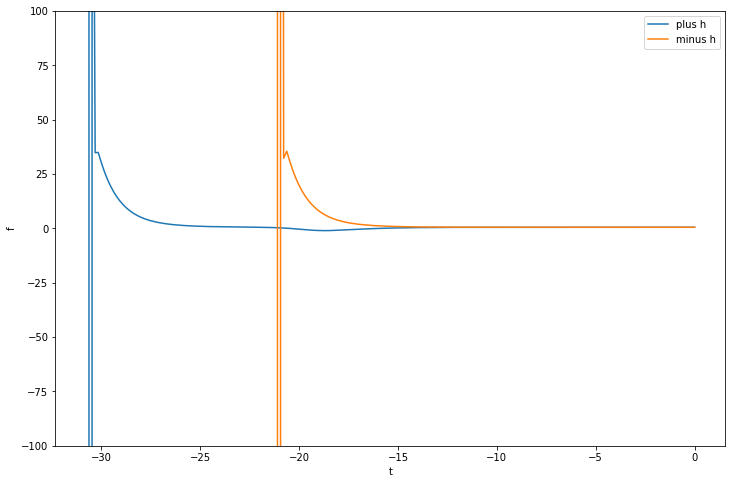

In [161]:
trajectories = []
times = []
mu=.35

trajectory, time = rk4_backward(f, t0, x0+h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

trajectory, time = rk4_backward(f, t0, x0-h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'{labels[i]}')
plt.ylim([-100, 100])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/orbit_35_backward.pdf',dpi=300)
plt.show()

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])


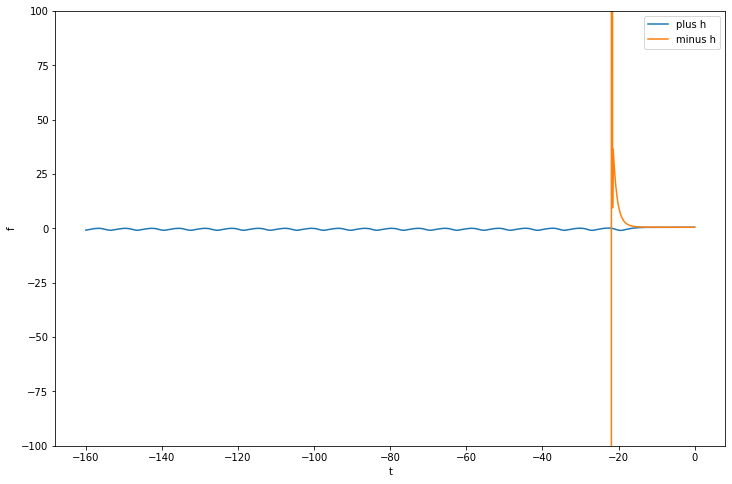

In [162]:
trajectories = []
times = []
mu=.45

trajectory, time = rk4_backward(f, t0, x0+h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

trajectory, time = rk4_backward(f, t0, x0-h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'{labels[i]}')
plt.ylim([-100, 100])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/orbit_45_backward.pdf',dpi=300)
plt.show()

C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: overflow encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])
C:\Users\JWant\AppData\Local\Temp\ipykernel_5324\202371318.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = np.array([-x2 , lam - mu*x2 - x1**2 - x1*x2])


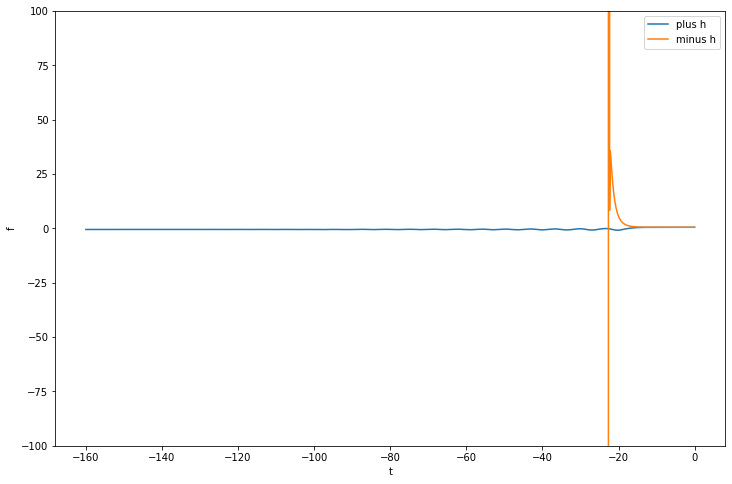

In [163]:
trajectories = []
times = []
mu=.55

trajectory, time = rk4_backward(f, t0, x0+h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

trajectory, time = rk4_backward(f, t0, x0-h*eigenvec1(mu), tau, n)
trajectories.append(trajectory)
times.append(time)

plt.figure(figsize=(12,8))
for i in range(len(trajectories)):
    plt.plot(time[:,0], trajectories[i][:,0],label=f'{labels[i]}')
plt.ylim([-100, 100])
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.savefig('figures/orbit_55_backward.pdf',dpi=300)
plt.show()

In [ ]:
# C)
# From B we can see that a change in the eigenvector is caused by a change in mu, completely changing the dynamics 

In [ ]:
# D)
